In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import sklearn.metrics as sm
import matplotlib.pyplot as plt

# Preparing the dataset

In [2]:
#loading batch1 and cycle1 dataset
df1 = pd.read_csv("cycle11")
#loading batch1 and cycle2 dataset
df2 = pd.read_csv("cycle12")
#loading batch1 and cycle3 dataset
df3 = pd.read_csv("cycle13")

In [4]:
df1.head()

,Unnamed: 0,I,T,V,t,SOC
0,0,0.000000,31.632496,2.026416,0.000000,0.000000
1,1,0.215908,31.632496,2.039388,0.002417,0.000001
2,2,0.359831,31.632496,2.051660,0.002912,0.000001
3,3,0.467846,31.632496,2.063070,0.003212,0.000001
4,4,0.575877,31.632496,2.076204,0.003498,0.000001


In [5]:
#dropping the columns form the first dataset
X1 = df1.drop(["SOC","Unnamed: 0","t"], axis=1)
Y1 = df1["SOC"]
print(X1.tail())
print(Y1.head())

             I          T         V
1082 -0.034227  31.712118  1.999842
1083 -0.034227  31.712118  2.002296
1084 -0.034227  31.712118  2.012406
1085 -0.034227  31.712118  2.022461
1086  0.000000  31.712118  2.025040
0    0.000000
1    0.000001
2    0.000001
3    0.000001
4    0.000001
Name: SOC, dtype: float64


In [6]:
#dropping the columns from the second dataset 
X2 = df2.drop(["SOC","Unnamed: 0","t"], axis=1)
Y2 = df2["SOC"]
print(X2.tail())
print(Y2.head())

             I          T         V
1112 -0.032917  31.620401  2.000061
1113 -0.032917  31.620401  2.002261
1114 -0.032917  31.620401  2.012339
1115 -0.032917  31.620401  2.022386
1116  0.000000  31.620401  2.024291
0    0.000000
1    0.000002
2    0.000002
3    0.000002
4    0.000002
Name: SOC, dtype: float64


In [7]:
#dropping the columns from the third dataset
X3 = df3.drop(["SOC","Unnamed: 0","t"], axis=1)
Y3 = df3["SOC"]
print(X3.tail())
print(Y3.head())

            I          T         V
1109 -0.03148  31.814196  1.999986
1110 -0.03148  31.814196  2.002065
1111 -0.03148  31.814196  2.012077
1112 -0.03148  31.814196  2.022086
1113  0.00000  31.814196  2.023423
0    0.000000e+00
1    3.275842e-10
2    3.275842e-10
3    3.275842e-10
4    3.275842e-10
Name: SOC, dtype: float64


# Fitting the model

In [8]:
#reshaping the output variable
Y1 = np.array([Y1])
Y1 = Y1.reshape(-1,1)
Y1 = np.ravel(Y1)
Y1.shape

(1087,)

In [9]:
#using the SVR model and fitting it to the training data
regressor1 = SVR(kernel="rbf")
regressor1.fit(X1, Y1)
print(regressor1.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [10]:
#Using the batch1 cycle2 data for testing
y_pred1 = regressor1.predict(X2)

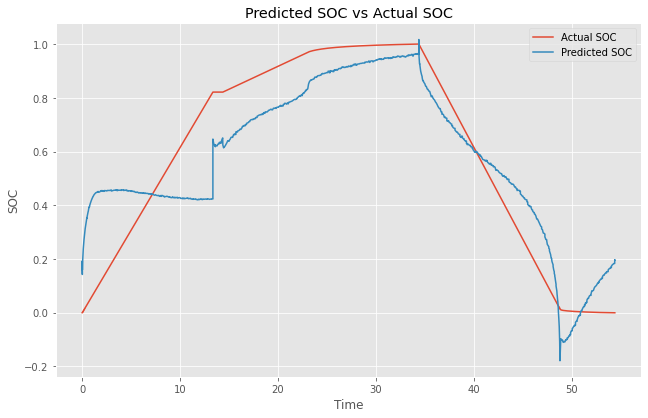

In [13]:
#plot for comparing the SOC prediction te the actual SOC values
plt.plot(df2.t, df2.SOC, label="Actual SOC")
plt.plot(df2.t, y_pred1, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [10]:
#erros we are getting for the first model when we use batch1 cycl2 as testing data
print(sm.mean_absolute_error(df2.SOC, y_pred1))

def mean_absolute_percentage_error(y_pred, y_actual):
    y_pred, y_actual = np.array(y_pred), np.array(y_actual)
    return np.median(np.abs((y_pred - y_actual)/y_actual))*100

print(mean_absolute_percentage_error(y_pred1, df2.SOC))
print(sm.mean_squared_error(df2.SOC, y_pred1))

0.13268727558082372
23.203620914541208
0.025265235860111417


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


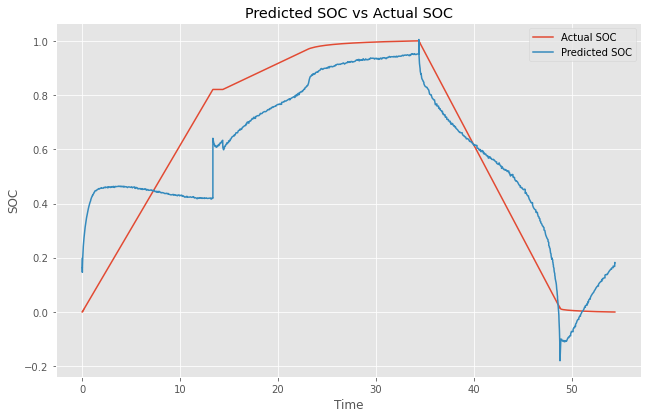

In [11]:
#Using batch1 and cycle3 data for testing pur model
y_pred2 = regressor1.predict(X3)
plt.plot(df3.t, df3.SOC, label="Actual SOC")
plt.plot(df3.t, y_pred2, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [12]:
print(sm.mean_absolute_error(df3.SOC, y_pred2))
print(sm.mean_squared_error(df3.SOC, y_pred2))

0.1360875683567946
0.026197808993963984


We have seen that mean absolute error when we used the batch1 cycle2 and batch1 cycle3 dataset for testing is almost the same. This is happeing when we used only one cycle for training i.e batch1 cycle1

# Fitting the second model

Here we will be using batch1 cycle1 and cycle2 data for training to get a sense of trend about the change in fitting. We will be using the batch1 cycle3 data for testing purposes

In [13]:
#taking the batch1 and cycle1 and batch1 cycle2 data and combining them
df = pd.concat([df1, df2])
df.shape

(2204, 6)

In [14]:
#dropping the columns and reshaping
df_X = df.drop(["Unnamed: 0", "SOC", "t"], axis=1)
df_Y = df["SOC"]
df_Y = np.array([df_Y])
df_Y = df_Y.reshape(-1,1)
df_Y = np.ravel(df_Y)

In [15]:
regressor2 = SVR(kernel="rbf")
regressor2.fit(df_X, df_Y)
print(regressor2.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


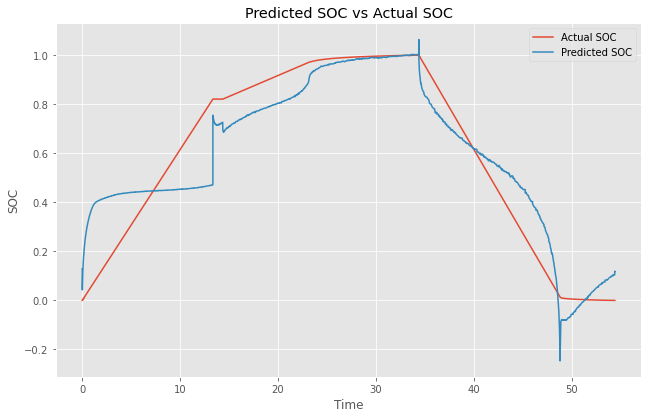

In [16]:
#getting the predictions out of the model and plotting the actual and predicted values
df_y_pred = regressor2.predict(X3)
plt.plot(df3.t, df3.SOC, label="Actual SOC")
plt.plot(df3.t, df_y_pred, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [17]:
print(sm.mean_absolute_error(df3.SOC, df_y_pred))
print(sm.mean_squared_error(df3.SOC, df_y_pred))

0.10587092686145973
0.017902129216756917


We have seen a reduction of mean absolute error from 13% to 10% also the mean squared error is reduced to 1.7% from 2.7%

# Fitting the third model

Now, i am taking a dataset which containing first 50 cycles of batch1 for training and using the 60th cycle for testing

In [18]:
#reading the dataset
df_cyc = pd.read_csv("cycles")
df_cyc.head()

,Unnamed: 0,I,Qc,Qd,T,V,t,SOC,C-rate
0,0,0.000000,0.000000,0.0,31.632496,2.026416,0.000000,0.000000,0.000000
1,1,0.215908,0.000001,0.0,31.632496,2.039388,0.002417,0.000001,0.196280
2,2,0.359831,0.000001,0.0,31.632496,2.051660,0.002912,0.000001,0.327119
3,3,0.467846,0.000001,0.0,31.632496,2.063070,0.003212,0.000001,0.425314
4,4,0.575877,0.000001,0.0,31.632496,2.076204,0.003498,0.000001,0.523525


In [19]:
df_cyc = df_cyc.drop(["Unnamed: 0","Qc","Qd","C-rate"], axis=1)
df_cyc.head()

,I,T,V,t,SOC
0,0.000000,31.632496,2.026416,0.000000,0.000000
1,0.215908,31.632496,2.039388,0.002417,0.000001
2,0.359831,31.632496,2.051660,0.002912,0.000001
3,0.467846,31.632496,2.063070,0.003212,0.000001
4,0.575877,31.632496,2.076204,0.003498,0.000001


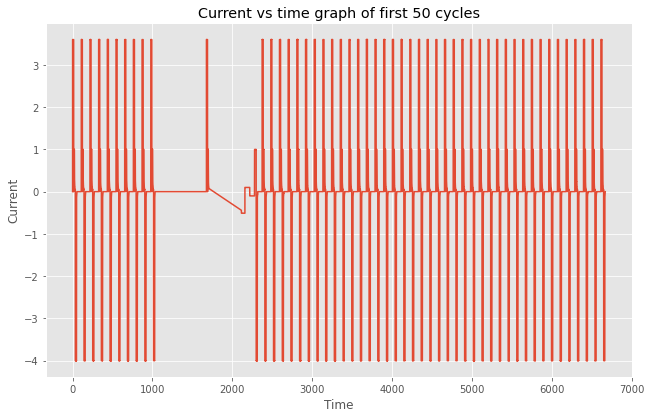

In [20]:
plt.plot(df_cyc.t, df_cyc.I)
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.xlabel("Time")
plt.ylabel("Current")
plt.title("Current vs time graph of first 50 cycles")
plt.style.use("ggplot")

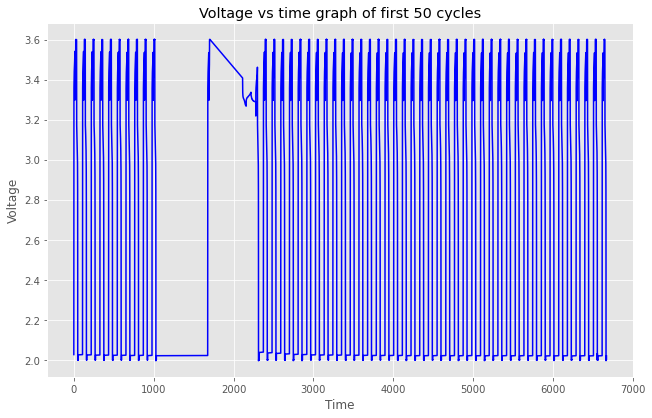

In [21]:
plt.plot(df_cyc.t, df_cyc.V, color="blue")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Voltage vs time graph of first 50 cycles")
plt.style.use("ggplot")

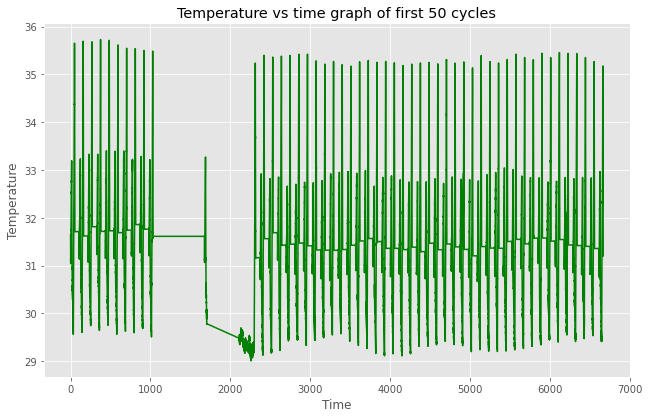

In [22]:
plt.plot(df_cyc.t, df_cyc["T"],color="green")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs time graph of first 50 cycles")
plt.style.use("ggplot")

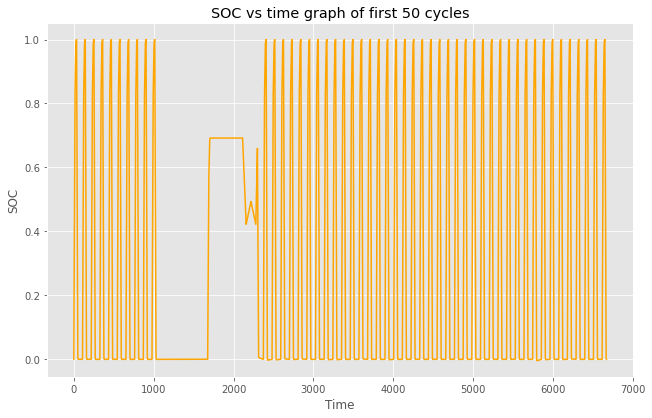

In [23]:
plt.plot(df_cyc.t, df_cyc.SOC,color="orange")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("SOC vs time graph of first 50 cycles")
plt.style.use("ggplot")

In [24]:
#reading the 60th cycle for testing the model
df60 = pd.read_csv("cycle160")
X60 = df60.drop(["SOC","Unnamed: 0","t"], axis=1)
Y60 = df60["SOC"]

In [25]:
df_cyc_X = df_cyc.drop(["SOC", "t"], axis=1)
df_cyc_Y = df_cyc["SOC"]
df_cyc_Y = np.array([df_cyc_Y])
df_cyc_Y = df_cyc_Y.reshape(-1,1)
df_cyc_Y = np.ravel(df_cyc_Y)
df_cyc_X.head()
#print(df_cyc_X.shape)

,I,T,V
0,0.000000,31.632496,2.026416
1,0.215908,31.632496,2.039388
2,0.359831,31.632496,2.051660
3,0.467846,31.632496,2.063070
4,0.575877,31.632496,2.076204


In [26]:
#training the model
regressor_now = SVR(kernel="rbf")
regressor_now.fit(df_cyc_X, df_cyc_Y)

SVR()

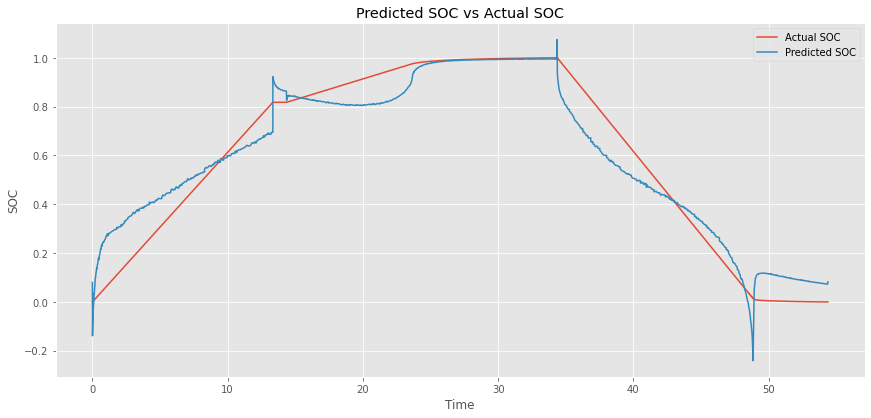

In [27]:
#testing and plotting the model predictions
df60_y_pred = regressor_now.predict(X60)
plt.plot(df60.t, df60.SOC, label="Actual SOC")
plt.plot(df60.t, df60_y_pred, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(14.5, 6.5)

In [28]:
print(mean_absolute_percentage_error(df60_y_pred, df60.SOC))
print(sm.mean_absolute_error(df60.SOC, df60_y_pred))
print(sm.mean_squared_error(df60.SOC, df60_y_pred))

14.386584075545098
0.07539366765501623
0.009242957620574054


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


Further the accuracy is improved

In [29]:
df1000 = pd.read_csv("cycle1000")
X1000 = df1000.drop(["Unnamed: 0", "SOC", "t"], axis=1)
Y1000 = df1000["SOC"]

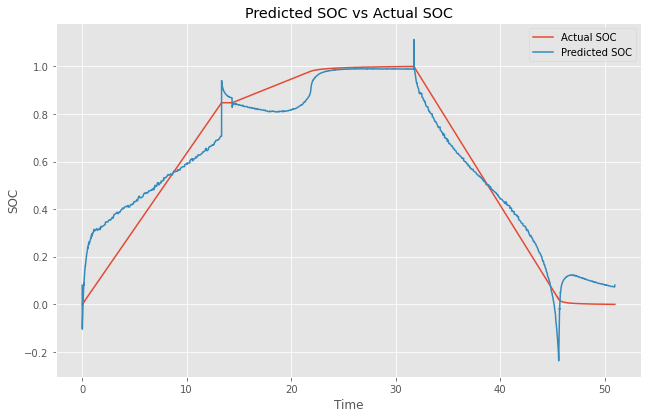

In [30]:
df1000_y_pred = regressor_now.predict(X1000)
plt.plot(df1000.t, Y1000, label="Actual SOC")
plt.plot(df1000.t, df1000_y_pred, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [31]:
print(mean_absolute_percentage_error(df1000_y_pred, df1000.SOC))
print(sm.mean_absolute_error(df1000.SOC, df1000_y_pred))
print(sm.mean_squared_error(df1000.SOC, df1000_y_pred))

12.888310401333406
0.07394346671066455
0.008880713117217715


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


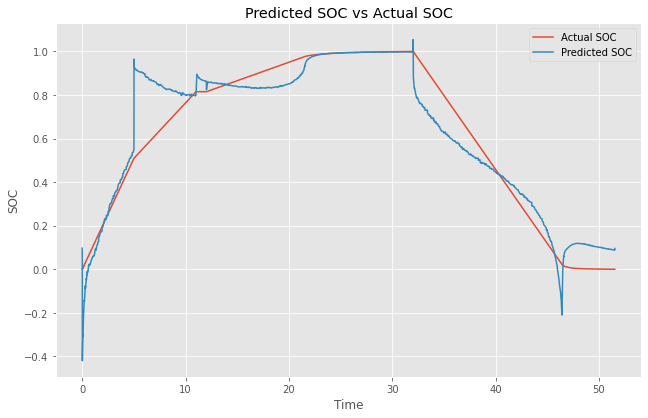

In [32]:
df30150 = pd.read_csv("cycle30150")
X30150 = df30150.drop(["Unnamed: 0", "SOC", "t"], axis=1)
Y30150 = df30150["SOC"]
df30150_y_pred = regressor_now.predict(X30150)
plt.plot(df30150.t, Y30150, label="Actual SOC")
plt.plot(df30150.t, df30150_y_pred, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [33]:
print(mean_absolute_percentage_error(df30150_y_pred, df30150.SOC))
print(sm.mean_absolute_error(df30150.SOC, df30150_y_pred))
print(sm.mean_squared_error(df30150.SOC, df30150_y_pred))

14.094511713562635
0.08573533661789175
0.015218803878889344


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


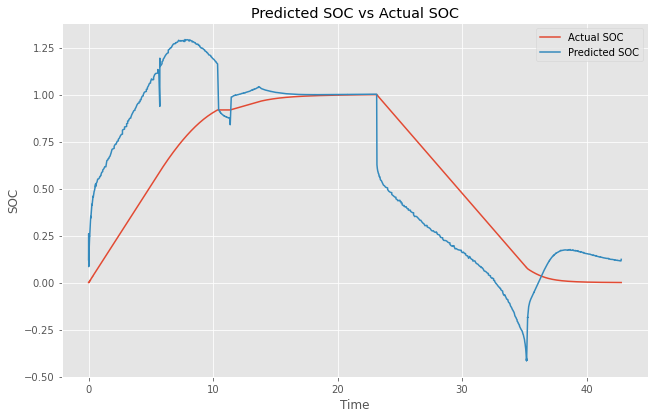

In [34]:
df22500 = pd.read_csv("cycle22500")
X22500 = df22500.drop(["Unnamed: 0", "SOC", "t"], axis=1)
Y22500 = df22500["SOC"]
df22500_y_pred = regressor_now.predict(X22500)
plt.plot(df22500.t, Y22500, label="Actual SOC")
plt.plot(df22500.t, df22500_y_pred, label="Predicted SOC")
plt.legend()
plt.xlabel("Time")
plt.ylabel("SOC")
plt.title("Predicted SOC vs Actual SOC")
plt.style.use("ggplot")
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)

In [35]:
print(mean_absolute_percentage_error(df22500_y_pred, df22500.SOC))
print(sm.mean_absolute_error(df22500.SOC, df22500_y_pred))
print(sm.mean_squared_error(df22500.SOC, df22500_y_pred))

85.84465937092523
0.2639788375587808
0.1034511755856557


D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


# Fitting the final model

In [2]:
df_final = pd.read_csv("TrainingSet")
X_final = df_final.drop(["Unnamed: 0", "SOC","t"], axis=1)
Y_final = df_final["SOC"]

In [3]:
X_final.shape

(1018084, 3)

In [4]:
Y_final = np.array([Y_final])
Y_final = Y_final.reshape(-1,1)
Y_final = np.ravel(Y_final)
Y_final.shape

(1018084,)

In [ ]:
regressor_final = SVR()
regressor_final.fit(X_final, Y_final)